# Experimentation_Phase : 1. Data_Exploration & Preliminary Model

## Dataset Description
This dataset focuses on thyroid cancer recurrence after Radioactive Iodine (RAI) therapy. It contains 383 patient records with 13 key attributes, including age, gender, cancer staging, pathology type, risk classification, treatment response, and recurrence status. The data is valuable for predicting cancer recurrence, understanding risk factors, and evaluating treatment outcomes.

📊 Dataset Overview
📌 Total Rows: 383
📌 Total Columns: 13
📌 No Missing Values

🔹 Column Descriptions
- Age : Age of the patient (in years).
- Gender : Patient's gender (Male or Female).
- Hx Radiotherapy : History of prior radiotherapy (Yes or No).
- Adenopathy : Presence of lymph node involvement (Yes or No).
- Pathology : Type of thyroid cancer (e.g., Micropapillary).
- Focality : Tumor focality (Uni-Focal or Multi-Focal).
- Risk : Cancer risk classification (Low, Intermediate, High).
- T : Tumor classification (T1, T2, etc.).
- N : Lymph node classification (N0, N1, etc.).
- M : Metastasis classification (M0, M1, etc.).
- Stage : Cancer staging (Stage I, II, III, IV).
- Response : Treatment response (Excellent, Indeterminate, etc.).
- Recurred : Whether cancer recurred (Yes or No).

🔍 Key Questions to Explore
- 1️⃣ Are thyroid cancer recurrences more common in men or women?
- 2️⃣ How does age affect recurrence risk?
- 3️⃣ Can we predict recurrence based on tumor staging and pathology?
- 4️⃣ What is the relationship between treatment response and recurrence?

📂 Usage
- This dataset is ideal for:
  - ✅ Machine Learning Models for recurrence prediction
  - ✅ Statistical Analysis of cancer progression
  - ✅ Medical Research on thyroid cancer

🔗 Source
This dataset is a modified version of the original dataset:
Differentiated Thyroid Cancer Recurrence by Joe Beach Capital.
https://www.kaggle.com/datasets/joebeachcapital/differentiated-thyroid-cancer-recurrence
I have removed unnecessary columns to focus on thyroid cancer recurrence analysis.

📜 License
🔹 Attribution 4.0 International (CC BY 4.0) – You are free to use, share, and modify with proper credit.

In [1]:
import re
import numpy as np                # to work with arrays
import pandas as pd                 # for data manipulation
import matplotlib.pyplot as plt       # for visualization
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler        # for scaling the features
from sklearn.linear_model import LogisticRegression      # classification model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score        # for performance measuring

import joblib         # To persist/save the model



In [2]:
# pipeline
from sklearn.pipeline import Pipeline

# for the preprocessors
from sklearn.base import BaseEstimator, TransformerMixin

# For binary variables
from sklearn.preprocessing import LabelEncoder

# For multi-class nominal variables
from sklearn.preprocessing import OneHotEncoder

# For ordinal variables
from sklearn.preprocessing import OrdinalEncoder

### Load & Explore the Dataset

In [3]:
data = pd.read_csv('filtered_thyroid_data.csv')

In [4]:
data.head()

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              383 non-null    int64 
 1   Gender           383 non-null    object
 2   Hx Radiothreapy  383 non-null    object
 3   Adenopathy       383 non-null    object
 4   Pathology        383 non-null    object
 5   Focality         383 non-null    object
 6   Risk             383 non-null    object
 7   T                383 non-null    object
 8   N                383 non-null    object
 9   M                383 non-null    object
 10  Stage            383 non-null    object
 11  Response         383 non-null    object
 12  Recurred         383 non-null    object
dtypes: int64(1), object(12)
memory usage: 39.0+ KB


### Data Exploration

#### Find numerical and categorical variables

In [6]:
# find numerical and categorical features
vars_num = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]
vars_cat = [col for col in data.columns if data[col].dtype in ['object']]

print(vars_num)
print(vars_cat)



['Age']
['Gender', 'Hx Radiothreapy', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']


#### Determine cardinality of categorical variables

In [7]:
data[vars_cat].nunique()

Gender             2
Hx Radiothreapy    2
Adenopathy         6
Pathology          4
Focality           2
Risk               3
T                  7
N                  3
M                  2
Stage              5
Response           4
Recurred           2
dtype: int64

#### Determine the distribution of numerical variables

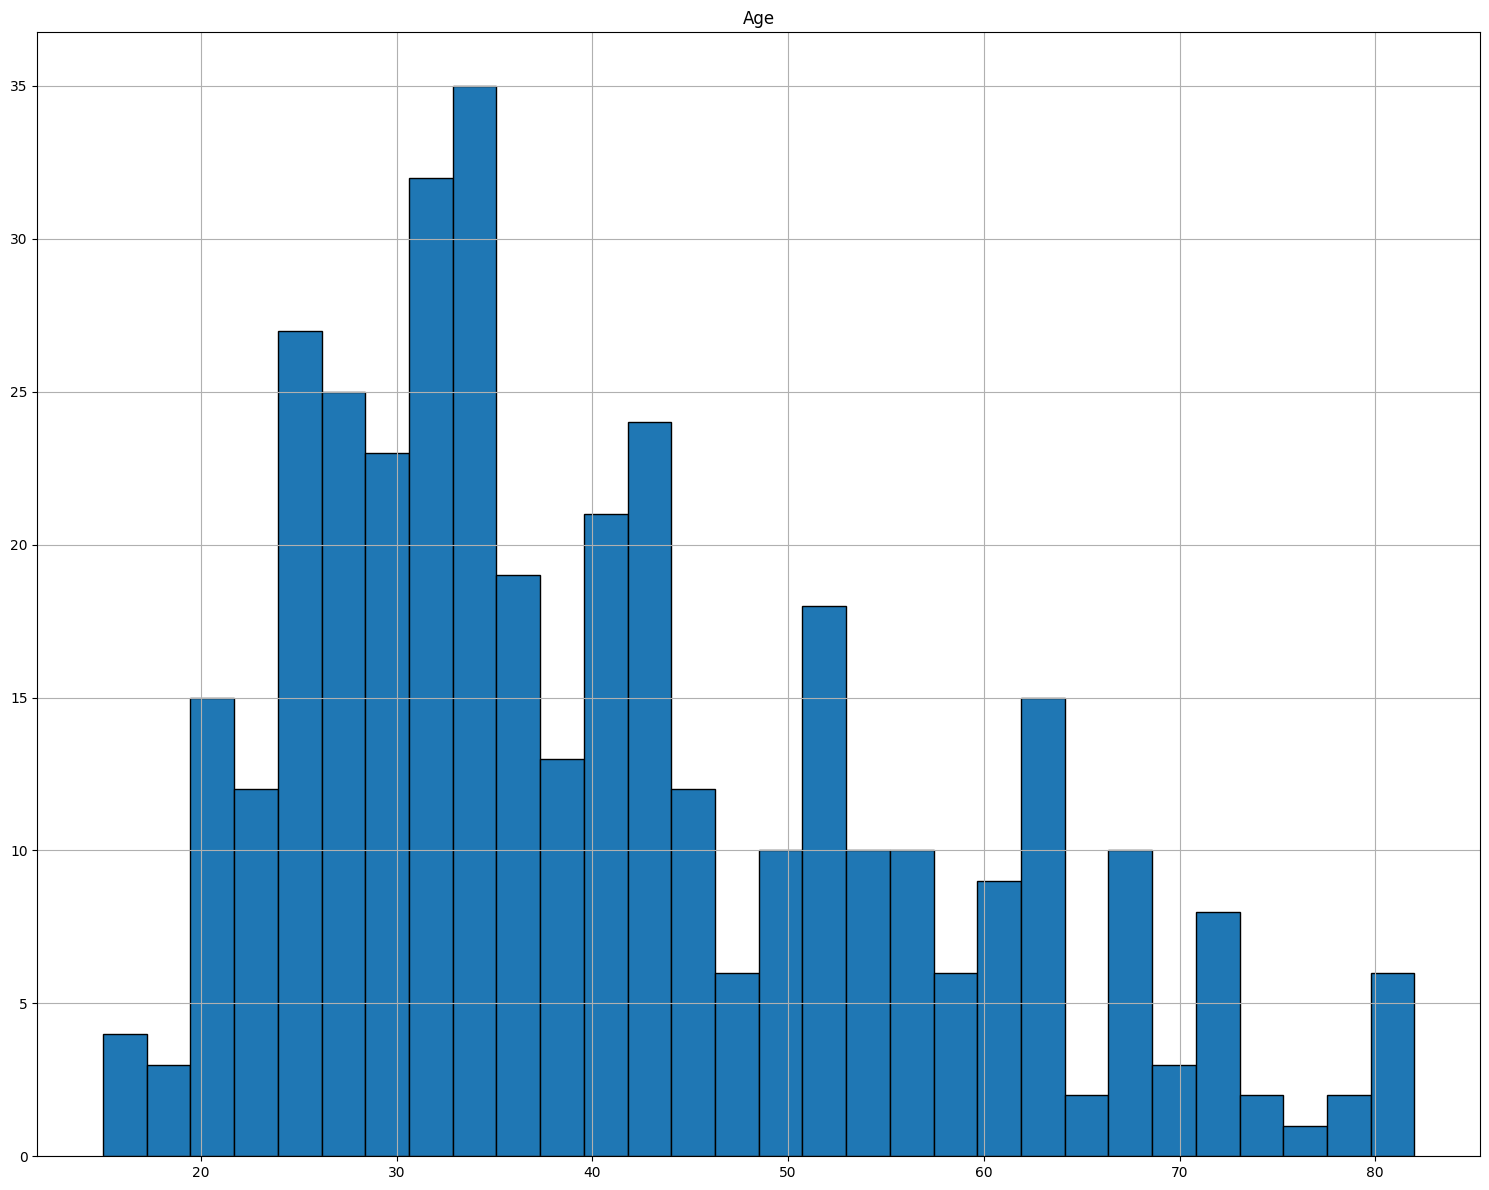

In [8]:
data[vars_num].hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

#### Determine the distribution of categorical columns

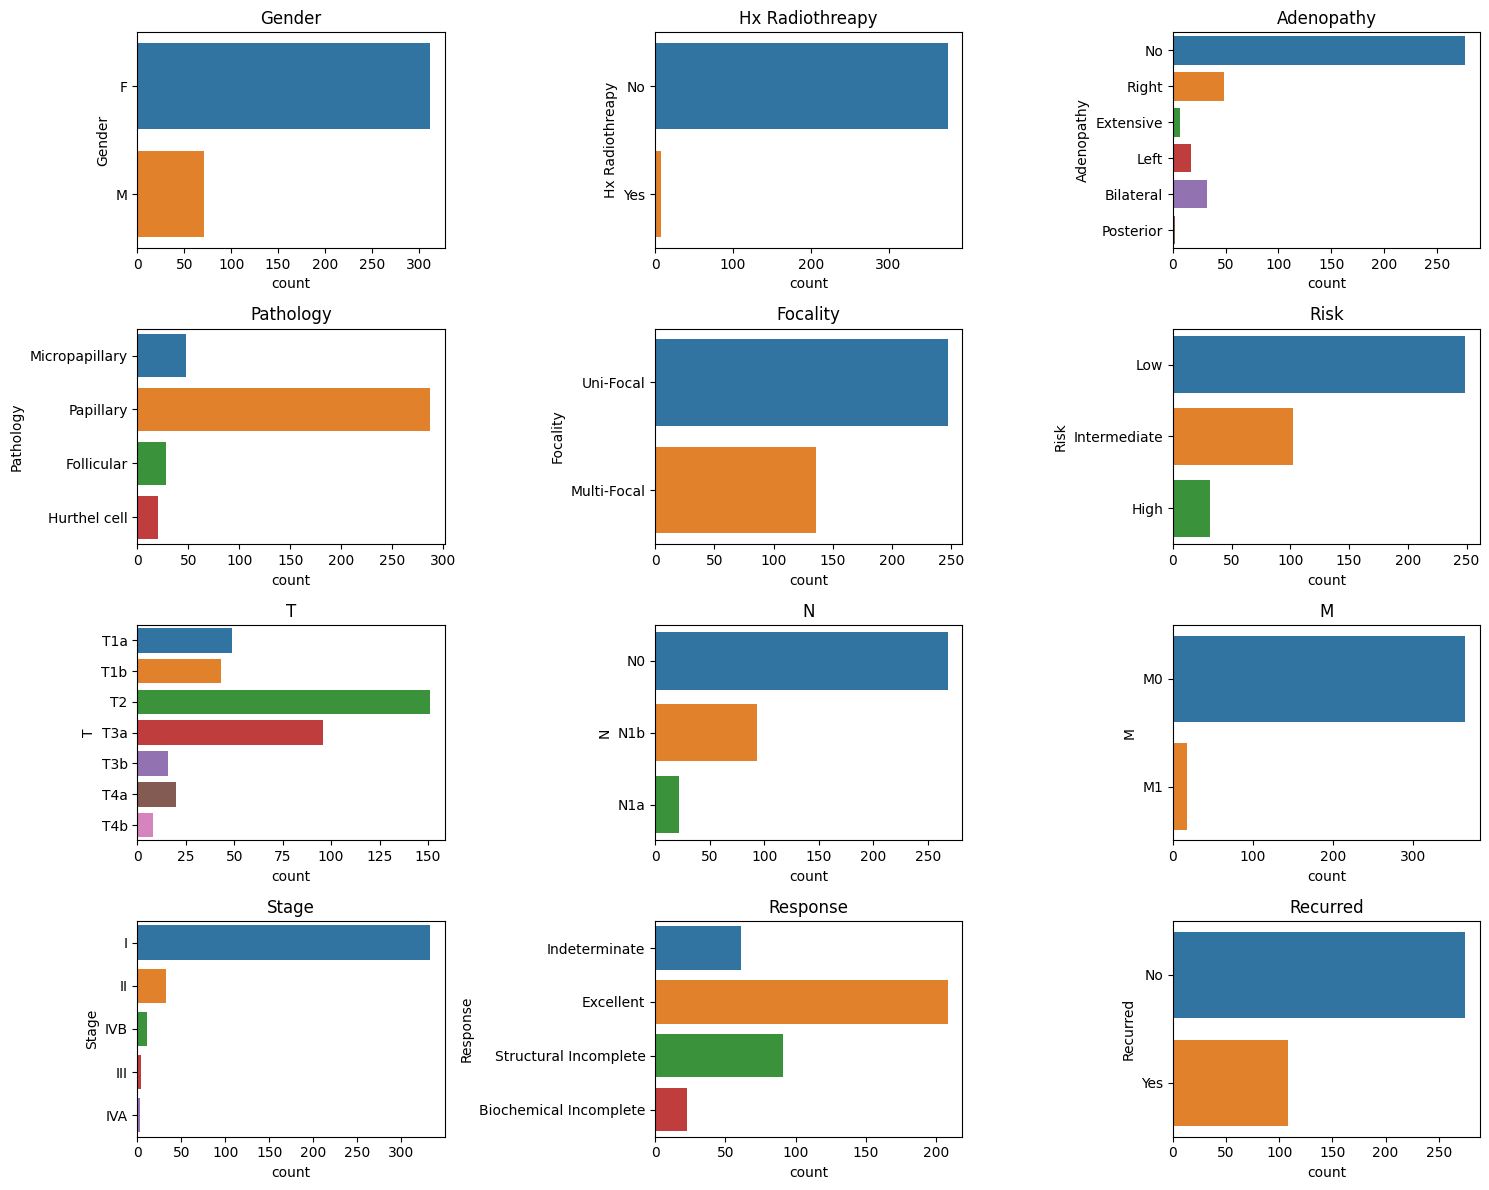

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(vars_cat):
    if i < len(axes):
        sns.countplot(y=col, data=data, ax=axes[i])
        axes[i].set_title(col)
        
plt.tight_layout()
plt.show()


### Split the data into train and test set

In [10]:
x = data.drop('Recurred', axis=1)
y = data['Recurred']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(306, 12) (77, 12) (306,) (77,)


### Feature Engineering

#### Mapping columns

In [11]:
# Dictionary mappings for each column
gender_mapping = {
    'F': 0,
    'M': 1
}

radiotherapy_mapping = {
    'No': 0,
    'Yes': 1
}

adenopathy_mapping = {
    'No': 0,
    'Right': 1,
    'Extensive': 2,
    'Left': 3,
    'Bilateral': 4,
    'Posterior': 5
}

pathology_mapping = {
    'Micropapillary': 0,
    'Papillary': 1,
    'Follicular': 2,
    'Hurthel cell': 3
}

focality_mapping = {
    'Uni-Focal': 0,
    'Multi-Focal': 1
}

risk_mapping = {
    'Low': 0,
    'Intermediate': 1,
    'High': 2
}

t_stage_mapping = {
    'T1a': 0,
    'T1b': 1,
    'T2': 2,
    'T3a': 3,
    'T3b': 4,
    'T4a': 5,
    'T4b': 6
}

n_stage_mapping = {
    'N0': 0,
    'N1b': 1,
    'N1a': 2
}

m_stage_mapping = {
    'M0': 0,
    'M1': 1
}

stage_mapping = {
    'I': 0,
    'II': 1,
    'IVB': 2,
    'III': 3,
    'IVA': 4
}

response_mapping = {
    'Indeterminate': 0,
    'Excellent': 1,
    'Structural Incomplete': 2,
    'Biochemical Incomplete': 3
}

recurred_mapping = {
    'No': 0,
    'Yes': 1
}



In [12]:
x_train['Gender'] = x_train['Gender'].map(gender_mapping).astype(int)
x_train['Hx Radiothreapy'] = x_train['Hx Radiothreapy'].map(radiotherapy_mapping).astype(int)
x_train['Adenopathy'] = x_train['Adenopathy'].map(adenopathy_mapping).astype(int)
x_train['Pathology'] = x_train['Pathology'].map(pathology_mapping).astype(int)
x_train['Focality'] = x_train['Focality'].map(focality_mapping).astype(int)
x_train['Risk'] = x_train['Risk'].map(risk_mapping).astype(int)
x_train['T'] = x_train['T'].map(t_stage_mapping).astype(int)
x_train['N'] = x_train['N'].map(n_stage_mapping).astype(int)
x_train['M'] = x_train['M'].map(m_stage_mapping).astype(int)
x_train['Stage'] = x_train['Stage'].map(stage_mapping).astype(int)
x_train['Response'] = x_train['Response'].map(response_mapping).astype(int)

x_train.head()



,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
165,40,0,0,0,1,1,0,2,0,0,0,1
321,62,0,0,1,1,1,1,3,1,0,1,2
220,29,0,0,0,1,0,0,2,2,0,0,0
94,37,0,0,0,3,1,0,2,0,0,0,1
232,31,0,0,3,1,0,1,2,1,0,0,2


In [13]:
y_train = y_train.map(recurred_mapping).astype(int)
y_test = y_test.map(recurred_mapping).astype(int)

#### Apply Standard Scalar 

In [14]:
scaler = StandardScaler()

In [15]:
X_train_scaled = scaler.fit_transform(x_train)

X_train_scaled[0,:]

array([-0.08221572, -0.51933568, -0.14142136, -0.52686304, -0.12888482,
        1.28874729, -0.6979317 , -0.20639551, -0.63695227, -0.21063855,
       -0.34035146, -0.26361791])

#### Create a single function for preprocessing the test set (X_test) and apply it.

In [16]:
def preprocess(df):
    df = df.copy()
    df['Gender'] = df['Gender'].map(gender_mapping).astype(int)
    df['Hx Radiothreapy'] = df['Hx Radiothreapy'].map(radiotherapy_mapping).astype(int)
    df['Adenopathy'] = df['Adenopathy'].map(adenopathy_mapping).astype(int)
    df['Pathology'] = df['Pathology'].map(pathology_mapping).astype(int)
    df['Focality'] = df['Focality'].map(focality_mapping).astype(int)
    df['Risk'] = df['Risk'].map(risk_mapping).astype(int)
    df['T'] = df['T'].map(t_stage_mapping).astype(int)
    df['N'] = df['N'].map(n_stage_mapping).astype(int)
    df['M'] = df['M'].map(m_stage_mapping).astype(int)
    df['Stage'] = df['Stage'].map(stage_mapping).astype(int)
    df['Response'] = df['Response'].map(response_mapping).astype(int)
    return df

In [17]:
X_test = preprocess(x_test)
X_test.head()


,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
268,32,0,0,0,1,0,0,3,0,0,0,1
250,30,0,0,1,2,0,0,3,0,0,0,1
318,30,0,0,4,1,1,1,3,1,0,0,2
331,51,0,0,0,2,0,1,3,0,0,0,2
56,43,0,0,0,1,0,0,1,0,0,0,1


In [18]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 268 to 84
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              77 non-null     int64
 1   Gender           77 non-null     int64
 2   Hx Radiothreapy  77 non-null     int64
 3   Adenopathy       77 non-null     int64
 4   Pathology        77 non-null     int64
 5   Focality         77 non-null     int64
 6   Risk             77 non-null     int64
 7   T                77 non-null     int64
 8   N                77 non-null     int64
 9   M                77 non-null     int64
 10  Stage            77 non-null     int64
 11  Response         77 non-null     int64
dtypes: int64(12)
memory usage: 7.8 KB


#### Apply standard scalar transformation for X_test

In [19]:
x_test_scaled = scaler.transform(X_test)
x_test_scaled[0,:]

array([-0.60770939, -0.51933568, -0.14142136, -0.52686304, -0.12888482,
       -0.77594732, -0.6979317 ,  0.55453253, -0.63695227, -0.21063855,
       -0.34035146, -0.26361791])

### Apply Logistic Regression

In [20]:
model_lr = LogisticRegression(penalty='l2', max_iter=1000)

In [21]:
model_lr.fit(X_train_scaled, y_train)

y_pred_lr = model_lr.predict(x_test_scaled)

print("Accuracy of Logistic Regression: ", accuracy_score(y_test, y_pred_lr)*100)
print("F1 Score of Logistic Regression: ", f1_score(y_test, y_pred_lr)*100)



Accuracy of Logistic Regression:  96.1038961038961
F1 Score of Logistic Regression:  91.42857142857143


/Users/aakashvardhan/miniconda3/envs/iisc-aimlops/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/aakashvardhan/miniconda3/envs/iisc-aimlops/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/aakashvardhan/miniconda3/envs/iisc-aimlops/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/aakashvardhan/miniconda3/envs/iisc-aimlops/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/aakashvardhan/miniconda3/envs/iisc-aimlops/lib/python3.11/site-packages/sklearn/linear_model/_linear_los

### Predict

In [30]:
new_data = {
    'Age': 35,
    'Gender': 'F',
    'Hx Radiothreapy': 'No',
    'Adenopathy': 'No',
    'Pathology': 'Micropapillary',
    'Focality': 'Uni-Focal',
    'Risk': 'High',
    'T': 'T1a',
    'N': 'N0',
    'M': 'M0',
    'Stage': 'I',
    'Response': 'Excellent'
}

new_data = pd.DataFrame(new_data, index=[0])
new_data = preprocess(new_data)
new_data_scaled = scaler.transform(new_data)

y_pred_new = model_lr.predict(new_data_scaled)

# inverse transform the prediction
def inverse_transform(y_pred):
    if y_pred == 0:
        return 'No'
    else:
        return 'Yes'
    
y_pred_new = inverse_transform(y_pred_new[0])

print("Predicted Recurrence: ", inverse_transform(y_pred_new[0]))

Predicted Recurrence:  Yes


In [23]:
# create random data generator
def generate_random_data(n_samples=1):
    data = {}
    data['Age'] = np.random.randint(10, 80, n_samples)
    data['Gender'] = np.random.choice(['F', 'M'], n_samples)
    data['Hx Radiothreapy'] = np.random.choice(['No', 'Yes'], n_samples)
    data['Adenopathy'] = np.random.choice(['No', 'Right', 'Extensive', 'Left', 'Bilateral', 'Posterior'], n_samples)
    data['Pathology'] = np.random.choice(['Micropapillary', 'Papillary', 'Follicular', 'Hurthel cell'], n_samples)
    data['Focality'] = np.random.choice(['Uni-Focal', 'Multi-Focal'], n_samples)
    data['Risk'] = np.random.choice(['Low', 'Intermediate', 'High'], n_samples)
    data['T'] = np.random.choice(['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b'], n_samples)
    data['N'] = np.random.choice(['N0', 'N1b', 'N1a'], n_samples)
    data['M'] = np.random.choice(['M0', 'M1'], n_samples)
    data['Stage'] = np.random.choice(['I', 'II', 'III', 'IVB'], n_samples)
    data['Response'] = np.random.choice(['Excellent', 'Indeterminate', 'Structural Incomplete', 'Biochemical Incomplete'], n_samples)
    return data

random_data = pd.DataFrame(generate_random_data(100))
random_data = preprocess(random_data)
random_data_scaled = scaler.transform(random_data)

y_pred_random = model_lr.predict(random_data_scaled)
print(y_pred_random)


[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1
 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1]


/Users/aakashvardhan/miniconda3/envs/iisc-aimlops/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/aakashvardhan/miniconda3/envs/iisc-aimlops/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/aakashvardhan/miniconda3/envs/iisc-aimlops/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [24]:
random_data.head(2)

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,19,0,1,3,2,1,0,2,0,1,1,2
1,50,0,1,3,0,0,1,4,0,1,2,2
